Description:

Statistical forecasting is the art and science of forecasting from data, with or without
knowing in advance what equation you should use. The idea is 
simple: look for statistical patterns in currently available data that you 
believe will continue into the future. In other words, figure out the way in 
which the future will look very much like the present, only longer.

Time Series forecasting techniques are very important for a data scientist
to master as time series data occur in every domain from medical, stock market,
climate change prediction, and so on.

In that note, here we have presented in front of you an opportunity 
to master time series forecasting techniques and along with that 
stand an opportunity to get an internship with TerraBlue XT.

EVALUATION: 
          The metrics in this competition is rmse score.

id - observation ID

time - timestamp for the given observation

feature - target feature to be predicted

### The metrics in this competition is rmse score.

In [1]:
import pandas as pd 
import numpy as np

import datetime

import warnings                             
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt

### Reading the Dataset

In [3]:
data = pd.read_csv('train_csv.csv')

In [4]:
data.head(3)

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53


In [5]:
data.shape

(80, 3)

In [6]:
data['time'] = pd.DatetimeIndex(data['time']).time
data.head(3)

,id,time,feature
0,0,00:00:00,237.97
1,1,00:00:10,57.93
2,2,00:00:20,90.53


In [7]:
data.drop("id",axis=1,inplace=True)

In [8]:
data = data.set_index('time')
data.head(3)

,feature
time,
00:00:00,237.97
00:00:10,57.93
00:00:20,90.53


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

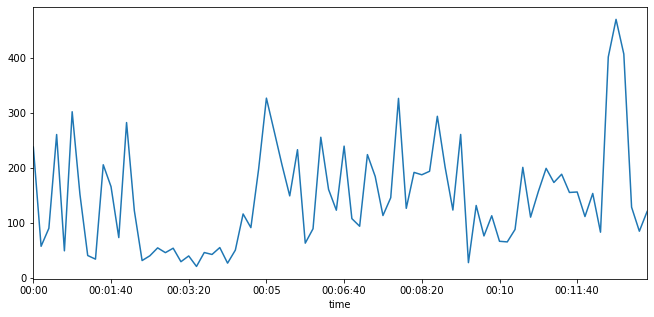

In [10]:
data['feature'].plot(figsize = (11,5))

In [11]:
data = data.reset_index()
data.head(3)

,time,feature
0,00:00:00,237.97
1,00:00:10,57.93
2,00:00:20,90.53


<Figure size 432x288 with 0 Axes>

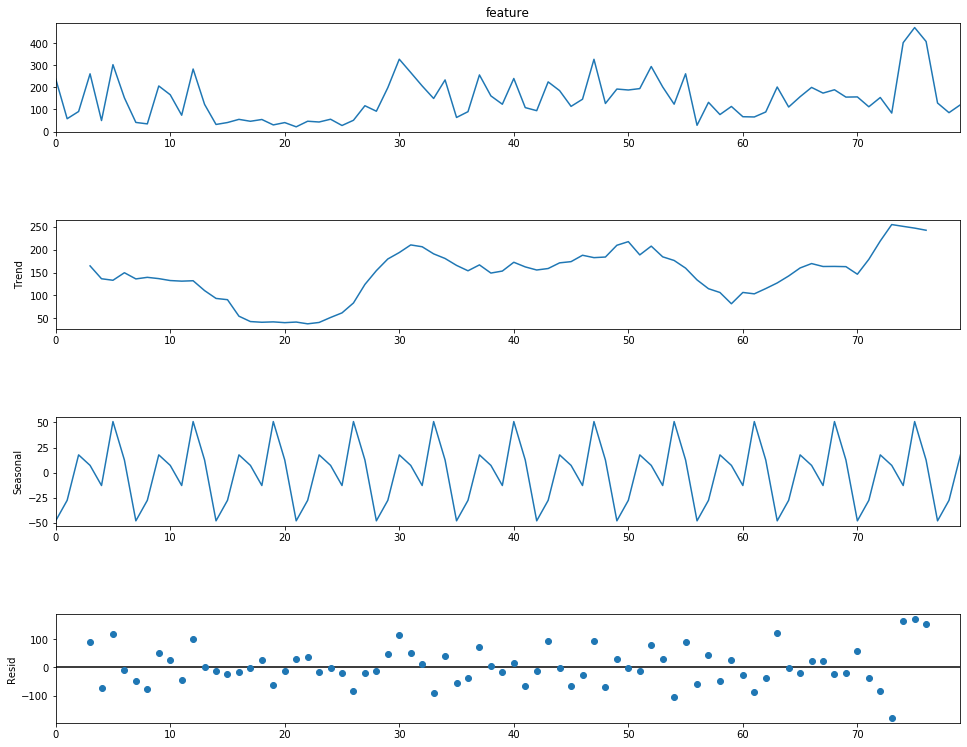

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
result = seasonal_decompose(data['feature'], model = 'additive', freq=7)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

### Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

In [13]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data['feature'])

Results of Dickey-Fuller Test:
Test Statistic                -5.945866e+00
p-value                        2.205049e-07
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


### The p-value  is LESS than significance level of 0.05. So the data is in Stationary

In [14]:
#importing packages for the prediction of time-series data

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

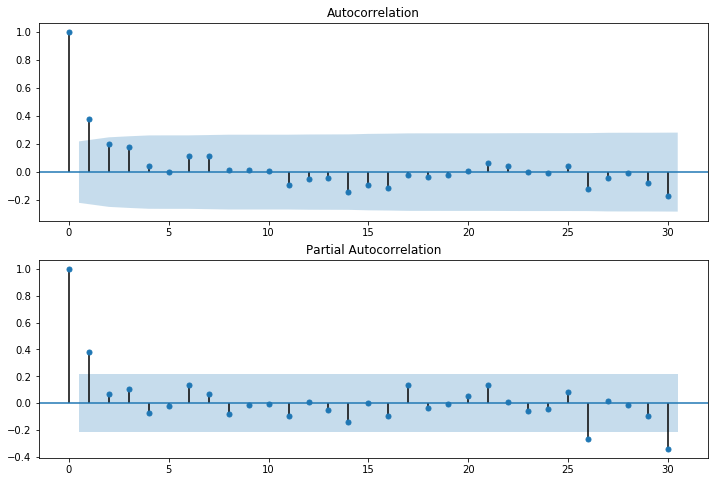

In [15]:
#Plotting ACF, PACF plot  - Original data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.feature, lags=30, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.feature, lags=30, ax=ax2)#

from the Above graph we have got an idea that with P =1 and Q = 1 would be good for model

As we observed there is a seasonal component in the we would be prefering to use the SARIMA model

## SARIMA MODEL

Trying different parameters , we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

We’ll start by plugging the optimal parameter values into a new SARIMAX model:

In [16]:
sarima_model = sm.tsa.statespace.SARIMAX(data.feature, trend='n', order=(1,0,1), seasonal_order=(1,0,1,7), initialization='approximate_diffuse').fit()
print(sarima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           feature   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood                -489.722
Date:                           Mon, 27 Apr 2020   AIC                            989.443
Time:                                   09:44:02   BIC                           1001.353
Sample:                                        0   HQIC                           994.218
                                            - 80                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9561      0.039     24.778      0.000       0.880       1.032
ma.L1         -0.4609      0.107     -4.313

NormaltestResult(statistic=3.1661943571770386, pvalue=0.20533814343146461)


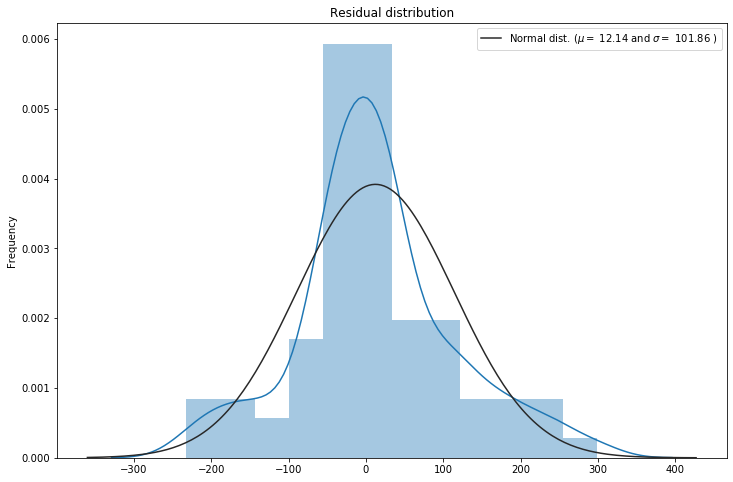

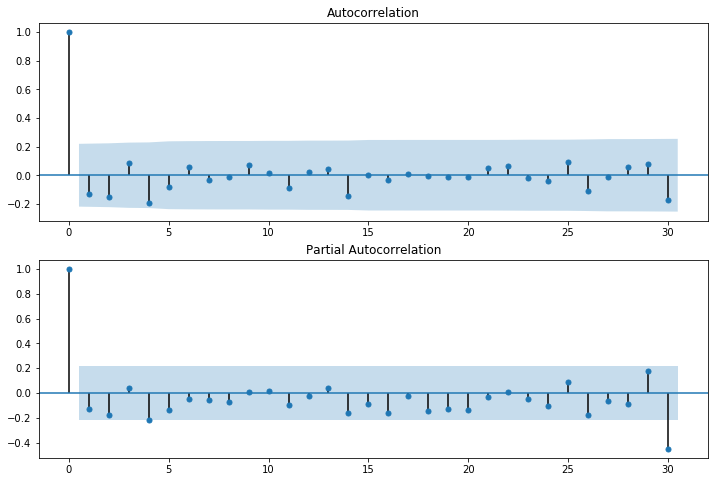

In [17]:
from scipy import stats
from scipy.stats import normaltest

resid = sarima_model.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('Residual distribution')



#  ACF and PACF Plot for SARIMA MODEL
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarima_model.resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarima_model.resid, lags=30, ax=ax2)

### We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

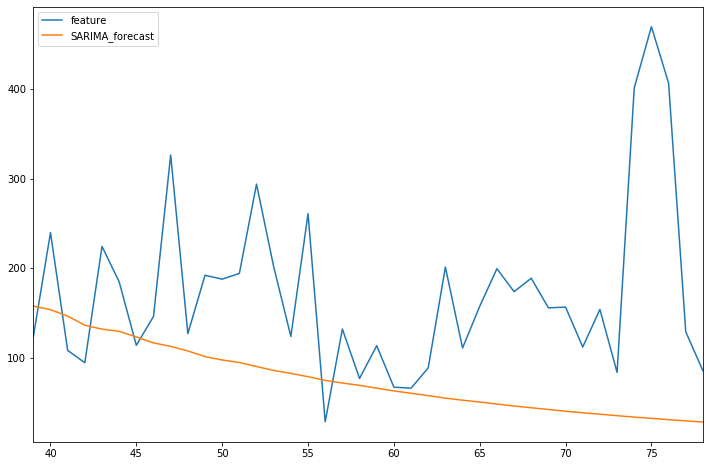

In [18]:
start_index = 39
end_index = 79
data['SARIMA_forecast'] = sarima_model.predict(start = start_index, end= end_index, dynamic= True)  
data[start_index:end_index][['feature', 'SARIMA_forecast']].plot(figsize=(12, 8))

In [19]:
data.tail()

,time,feature,SARIMA_forecast
75,00:12:30,469.72,32.165000
76,00:12:40,406.79,30.744557
77,00:12:50,128.91,29.342623
78,00:13:00,85.28,28.074638
79,00:13:10,121.12,26.887276


In [20]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print(rmse)

<function rmse at 0x000002BBA43088C8>


In [21]:
rmse(data[39:79]['feature'],data[39:79]['SARIMA_forecast'])

143.2835828848841

In [22]:
data[39:79]['feature'].values

array([123.41, 239.69, 108.12,  94.31, 224.3 , 184.75, 113.74, 146.06,
       326.35, 126.81, 192.  , 187.7 , 194.04, 293.84, 201.54, 123.67,
       260.87,  28.26, 131.97,  76.73, 113.35,  67.01,  65.89,  88.47,
       201.17, 110.79, 157.37, 199.37, 173.72, 188.69, 155.62, 156.46,
       111.91, 153.83,  83.51, 401.43, 469.72, 406.79, 128.91,  85.28])

In [23]:
data[39:79]['SARIMA_forecast'].values

array([157.49711336, 153.61474585, 146.3698613 , 136.25602301,
       131.83628939, 129.41758942, 123.12357698, 116.45765248,
       112.62957129, 107.47003463, 101.18433197,  97.40316001,
        94.55508846,  90.14213127,  85.64784277,  82.43128978,
        78.71953309,  74.59663657,  71.60076638,  69.06209447,
        65.91762534,  62.79450807,  60.26716397,  57.5806938 ,
        54.76853523,  52.4814408 ,  50.43304003,  48.17016661,
        45.95714845,  44.03601477,  42.08462289,  40.11552726,
        38.40338323,  36.8251386 ,  35.18700792,  33.59982025,
        32.16499975,  30.74455662,  29.34262345,  28.07463818])

In [24]:
test = pd.read_csv("test_csv.csv")

In [25]:
SARIMA_forecast = sarima_model.forecast(40)

In [26]:
SARIMA_forecast

80     128.204431
81     126.348487
82     122.032834
83     116.103544
84     107.842860
85     102.380733
86      98.702402
87      94.357673
88      91.814567
89      88.304546
90      84.183347
91      79.143065
92      75.358089
93      72.394725
94      69.210117
95      66.849147
96      64.134076
97      61.213429
98      57.954142
99      55.276907
100     52.995473
101     50.665114
102     48.727371
103     46.680443
104     44.585567
105     42.384534
106     40.466495
107     38.750812
108     37.047206
109     35.541651
110     34.019772
111     32.506240
112     30.975088
113     29.590289
114     28.316464
115     27.071743
116     25.934013
117     24.811269
118     23.713023
119     22.627329
dtype: float64

In [27]:
Sarima = pd.DataFrame(SARIMA_forecast)

In [28]:
new_df = pd.DataFrame(zip(test['id'],Sarima[0]),columns=['id','feature'])
new_df.to_csv("sarimma.csv",index=False)
new_df.shape

(40, 2)

# ARIMA MODEL

In [29]:
arima_model = sm.tsa.ARIMA(data.feature, (1,0,1)).fit(disp=False)
print(arima_model.summary())

                              ARMA Model Results                              
Dep. Variable:                feature   No. Observations:                   80
Model:                     ARMA(1, 1)   Log Likelihood                -472.544
Method:                       css-mle   S.D. of innovations             88.840
Date:                Mon, 27 Apr 2020   AIC                            953.088
Time:                        09:44:06   BIC                            962.616
Sample:                             0   HQIC                           956.908
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           147.7855     17.522      8.434      0.000     113.444     182.128
ar.L1.feature     0.5710      0.251      2.275      0.023       0.079       1.063
ma.L1.feature    -0.2336      0.304     

NormaltestResult(statistic=10.770279347713753, pvalue=0.004584199984629779)


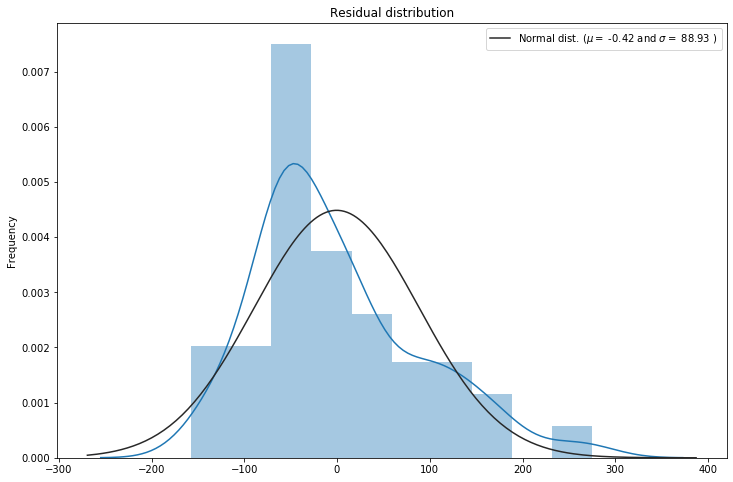

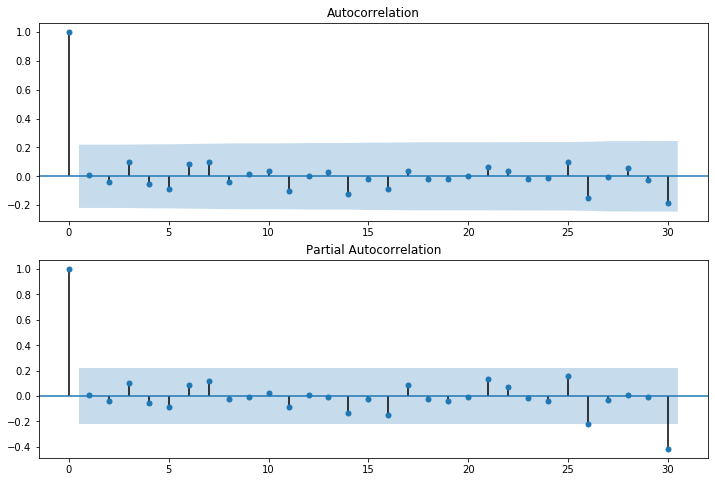

In [30]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_model.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model.resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model.resid, lags=30, ax=ax2)

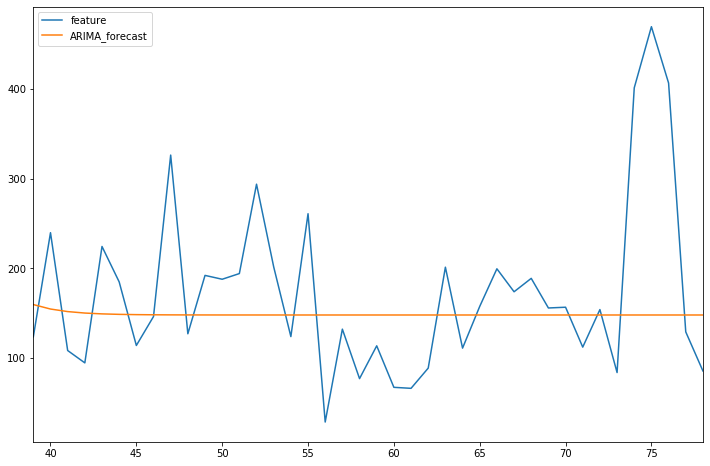

In [31]:
start_index = 39
end_index = 79
data['ARIMA_forecast'] = arima_model.predict(start = start_index, end= end_index, dynamic= True)  
data[start_index:end_index][['feature', 'ARIMA_forecast']].plot(figsize=(12, 8))

In [32]:
rmse(data[39:79]['feature'],data[39:79]['ARIMA_forecast'])

98.61881487166323

In [33]:
data[39:79]['feature'].values

array([123.41, 239.69, 108.12,  94.31, 224.3 , 184.75, 113.74, 146.06,
       326.35, 126.81, 192.  , 187.7 , 194.04, 293.84, 201.54, 123.67,
       260.87,  28.26, 131.97,  76.73, 113.35,  67.01,  65.89,  88.47,
       201.17, 110.79, 157.37, 199.37, 173.72, 188.69, 155.62, 156.46,
       111.91, 153.83,  83.51, 401.43, 469.72, 406.79, 128.91,  85.28])

In [34]:
data[39:79]['ARIMA_forecast'].values

array([159.44437869, 154.4426871 , 151.58674075, 149.95600656,
       149.0248637 , 148.49318477, 148.18959818, 148.01625143,
       147.91727111, 147.86075373, 147.82848253, 147.8100558 ,
       147.79953421, 147.79352643, 147.790096  , 147.78813724,
       147.7870188 , 147.78638017, 147.78601552, 147.78580731,
       147.78568842, 147.78562053, 147.78558177, 147.78555963,
       147.785547  , 147.78553978, 147.78553566, 147.78553331,
       147.78553196, 147.7855312 , 147.78553076, 147.78553051,
       147.78553036, 147.78553028, 147.78553024, 147.78553021,
       147.78553019, 147.78553019, 147.78553018, 147.78553018])

In [35]:
Arima_forecast = arima_model.forecast(40)

In [36]:
Arima_forecast

(array([135.00983238, 140.49065668, 143.62018592, 145.40713489,
        146.42747577, 147.01008642, 147.34275482, 147.53270718,
        147.64116923, 147.70310064, 147.73846323, 147.75865513,
        147.77018463, 147.77676793, 147.78052697, 147.78267336,
        147.78389895, 147.78459875, 147.78499833, 147.7852265 ,
        147.78535677, 147.78543116, 147.78547364, 147.78549789,
        147.78551174, 147.78551965, 147.78552416, 147.78552674,
        147.78552821, 147.78552906, 147.78552954, 147.78552981,
        147.78552997, 147.78553006, 147.78553011, 147.78553014,
        147.78553015, 147.78553016, 147.78553017, 147.78553017]),
 array([88.83974063, 93.75867619, 95.30756563, 95.80714738, 95.9694671 ,
        96.02232995, 96.03955888, 96.04517547, 96.04700662, 96.04760363,
        96.04779827, 96.04786174, 96.04788243, 96.04788917, 96.04789137,
        96.04789209, 96.04789232, 96.0478924 , 96.04789242, 96.04789243,
        96.04789244, 96.04789244, 96.04789244, 96.04789244, 96.047

In [37]:
array = [107.12368133, 110.68984469, 108.06693182, 107.6250697 ,
        106.41459815, 105.47498708, 104.43992389, 103.43849833,
        102.42521877, 101.4161166 , 100.4055423 ,  99.39548678,
         98.38524844,  97.37507453,  96.36487792,  95.3546893 ,
         94.34449787,  93.33430743,  92.32411664,  91.31392597,
         90.30373526,  89.29354456,  88.28335386,  87.27316316,
         86.26297247,  85.25278177,  84.24259107,  83.23240037,
         82.22220967,  81.21201897,  80.20182827,  79.19163757,
         78.18144687,  77.17125617,  76.16106547,  75.15087478,
         74.14068408,  73.13049338,  72.12030268,  71.11011198]

In [38]:
forcasted_values = pd.DataFrame(array)

In [39]:
forcasted_values

,0
0,107.123681
1,110.689845
2,108.066932
3,107.625070
4,106.414598
5,105.474987
6,104.439924
7,103.438498
8,102.425219
9,101.416117


In [40]:
new_df = pd.DataFrame(zip(test['id'],forcasted_values[0]),columns=['id','feature'])
new_df.to_csv("arimma.csv",index=False)
new_df.shape

(40, 2)